In [340]:
import numpy as np
import pandas as pd

In [341]:
df = pd.read_csv(
    "spam.csv",
    encoding="latin-1",
    on_bad_lines="skip"
)


In [342]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3437,ham,Its good to hear from you,NaN,NaN,NaN
639,ham,I had askd u a question some hours before. Its...,NaN,NaN,NaN
3848,ham,U in town alone?,NaN,NaN,NaN
2949,ham,Where are you ? You said you would be here whe...,NaN,NaN,NaN
1579,ham,"Why is that, princess? I bet the brothas are a...",NaN,NaN,NaN


In [343]:
df.shape

(5572, 5)

## Steps:
1. Data Cleaning
2. EDA - Exploratory Data Analysis
3. Text Preprocessing - vectorization, stepping, remove stopwords
4. Model Building
5. Evaluation
6. Improvements (depending on the evaluation)
7. Website
8. Deploy on Heroku

## 1. Data Cleaning

Check if there are any columns that we can remove.

In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [345]:
# By the above observation, we will drop last three columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [346]:
df.sample(5)

,v1,v2
1713,spam,Hard LIVE 121 chat just 60p/min. Choose your g...
3854,spam,Free msg: Single? Find a partner in your area!...
279,ham,All done? All handed in? Celebrations in full ...
4592,ham,It's ok i wun b angry. Msg u aft i come home t...
121,ham,here is my new address -apples&pairs&all that ...


In [347]:
# Renaming the columns to something that is more descriptive to their role in the data
df.rename(columns={'v1':'target', 'v2':'text'}, inplace = True)
df.sample(5)

,target,text
3173,ham,It vl bcum more difficult..
1335,ham,"Sometimes we put walls around our hearts,not j..."
2847,ham,Sad story of a Man - Last week was my b'day. M...
245,ham,Too late. I said i have the website. I didn't ...
4112,ham,Thought we could go out for dinner. I'll treat...


In [348]:
# Encode 0 to ham and 1 to spam in the target column
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder() #object of label encoder

In [349]:
df['target'] = encoder.fit_transform(df['target'])

In [350]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [351]:
# Check for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [352]:
# Check for duplicate values
df.duplicated().sum()

np.int64(403)

In [353]:
# remove duplicates
df = df.drop_duplicates(keep = 'first')

In [354]:
df.duplicated().sum()

np.int64(0)

In [355]:
df.shape

(5169, 2)

## 2. EDA
- EDA Stands for Exploratory data analysis..
- This is done to get the basic understanding of the data.

In [356]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [357]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

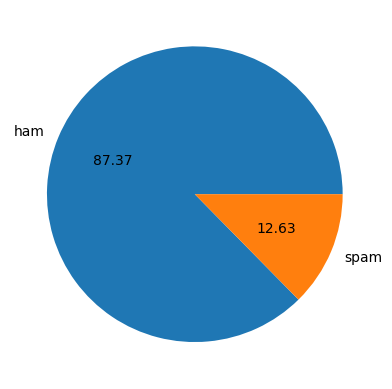

In [358]:
# To represent it better, we will use pie chart.
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

By the above representation, we can clearly see that data is imbalanced

### Now, for deeper understanding, we will make 3 new columns:
1. No. of characters in the SMS
2. No. of words in the SMS
3. No. of sentences in the SMS

In [359]:
#nltk - natural language toolkit
!pip install nltk


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [360]:
import nltk

In [361]:
# This is done to download some Nltk Dependencies
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\affan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [362]:
# add new column for num of characters
df['num_characters'] = df['text'].apply(len)

In [363]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [364]:
df['num_words'] = df['text'].apply(lambda x: len(x.split()))


In [365]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13


In [366]:
import re

df['num_sentences'] = df['text'].apply(
    lambda x: len(re.findall(r'[.!?]+', x))
)


In [367]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1
3,0,U dun say so early hor... U c already then say...,49,11,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0


In [368]:
# To get the summary of the last 3 columns
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.340685,1.846779
std,58.236293,11.068488,1.745441
min,2.000000,1.000000,0.000000
25%,36.000000,7.000000,1.000000
50%,60.000000,12.000000,2.000000
75%,117.000000,22.000000,3.000000
max,910.000000,171.000000,39.000000


### Analize Ham and Spam Seperately for better observation

In [369]:
# Ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.134632,1.692648
std,56.358207,11.116240,1.681598
min,2.000000,1.000000,0.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,1.000000
75%,90.000000,18.000000,2.000000
max,910.000000,171.000000,39.000000


In [370]:
# Spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,23.681470,2.912711
std,30.137753,5.967672,1.806610
min,13.000000,2.000000,0.000000
25%,132.000000,22.000000,2.000000
50%,149.000000,25.000000,3.000000
75%,157.000000,28.000000,4.000000
max,224.000000,35.000000,9.000000


In [371]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

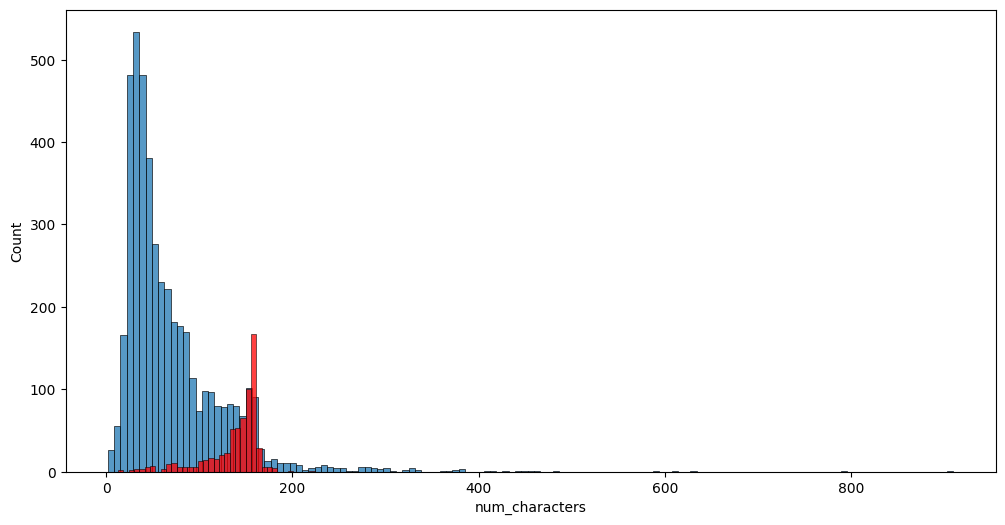

In [372]:
# Plotting Histogram to differentiate between spam and ham on the basis of number of characters
plt.figure(figsize = (12, 6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color = 'red')

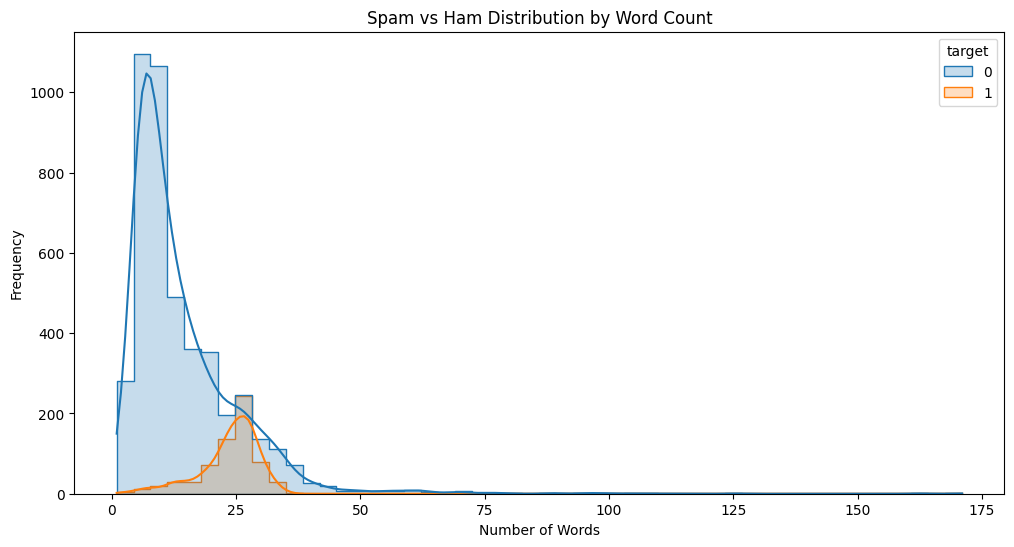

In [373]:
plt.figure(figsize=(12, 6))

sns.histplot(
    data=df,
    x="num_words",
    hue="target",
    bins=50,
    kde=True,
    element="step"
)

plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.title("Spam vs Ham Distribution by Word Count")
plt.show()


### From the above observation, we can clearly see that spam messages are generally bigger in terms of number of characters, words or sentences

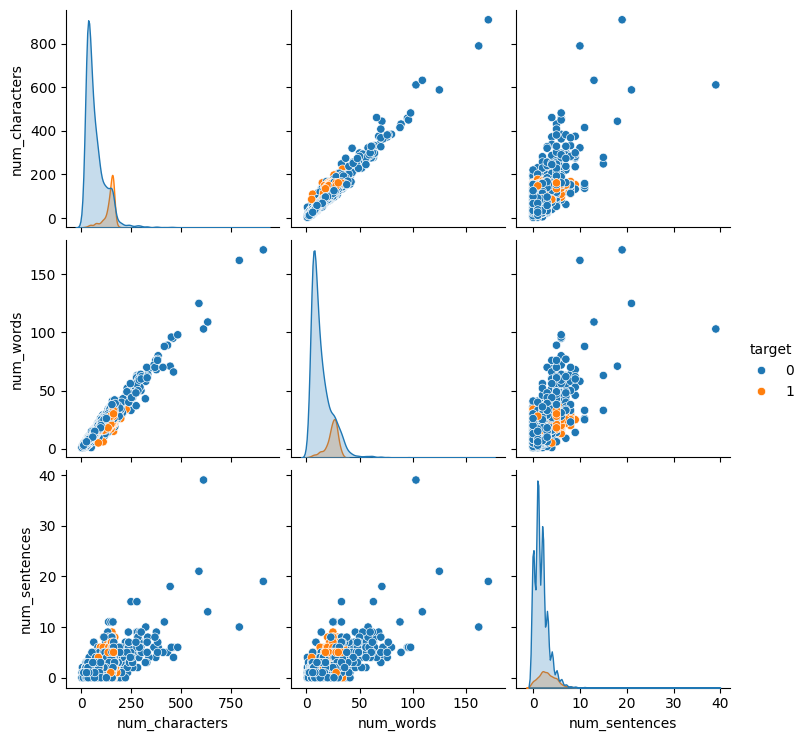

In [374]:
# Checking the relationship among last 3 columns
sns.pairplot(df, hue = 'target')

### We can see from the above graph that there are outliers in the data that can degrade the analysis

<Axes: >

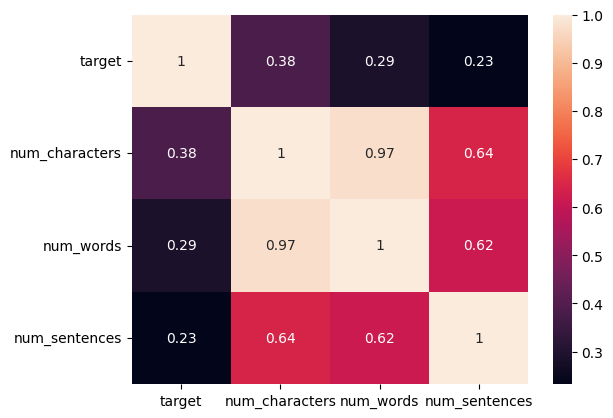

In [375]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)


### By the above heatmap, we can conclude that the relation between target and num_characters will give the best result

## 3. Data Preprocessing
- Lower case
- Tokenization (break into words and convert it into list)
- Removing special characters
- Removing stop words and punctuation: Stopwords are those words which have no contribution in the meaning of the sentence but are used to in the formation of the sentences.
- Stemming: To bring words to their root form.

In [376]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\affan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [377]:
# For removing stopwords
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [378]:
# For removing Punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [379]:
# For Stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [380]:
# Function that will preform all the data processing
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [381]:
def transform_text(text):
    text = text.lower()
    words = text.split()   # ✅ no nltk tokenizer

    words = [w for w in words if w.isalnum()]
    words = [w for w in words if w not in stopwords.words('english')]
    words = [ps.stem(w) for w in words]

    return " ".join(words)


In [382]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1
3,0,U dun say so early hor... U c already then say...,49,11,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0


#### Now, we will generate the word cloud for all the words. It will display the words based on the occurence in data. Therefore, by doing this, we will get to know which words are used the most

In [383]:
!pip install wordcloud


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [384]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [385]:
df['transformed_text'] = df['text'].apply(transform_text)

spam_text = df[df['target'] == 1]['transformed_text'].str.cat(sep=" ")

spam_wc = wc.generate(spam_text)

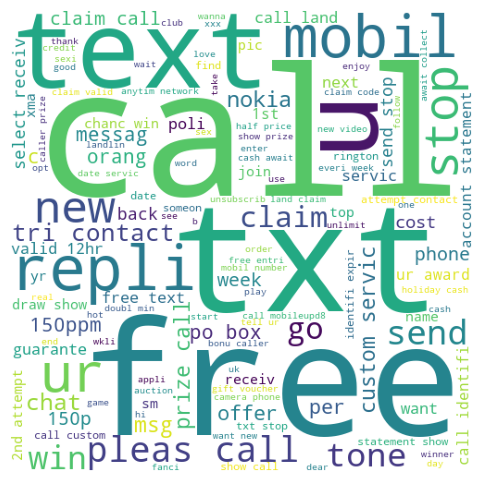

In [386]:
plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)
plt.axis("off")
plt.show()


In [387]:
# Word cloud for Ham Messages
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

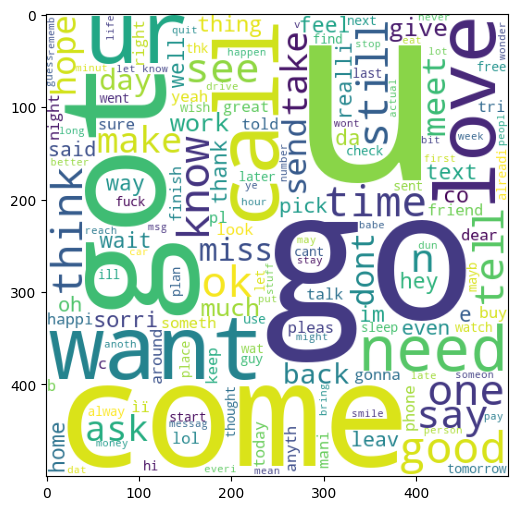

In [388]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

#### Our next task is to find out the top words used in both Spam and Ham messages.

In [389]:
# For spam messages
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [390]:
len(spam_corpus)

8176

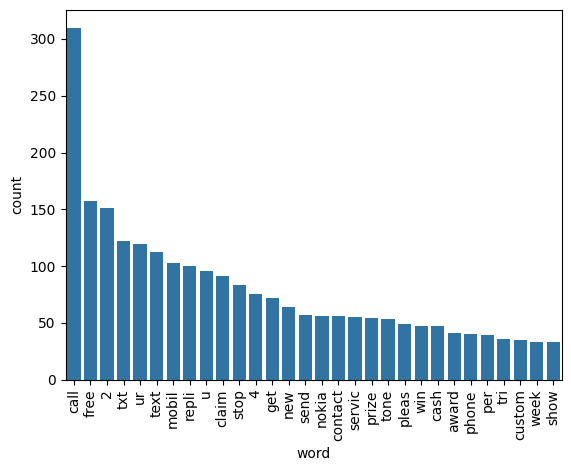

In [391]:
from collections import Counter
import pandas as pd

common_words = pd.DataFrame(
    Counter(spam_corpus).most_common(30),
    columns=["word", "count"]
)

sns.barplot(data=common_words, x="word", y="count")
plt.xticks(rotation=90)
plt.show()


In [392]:
# For Ham messages
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [393]:
len(ham_corpus)

27382

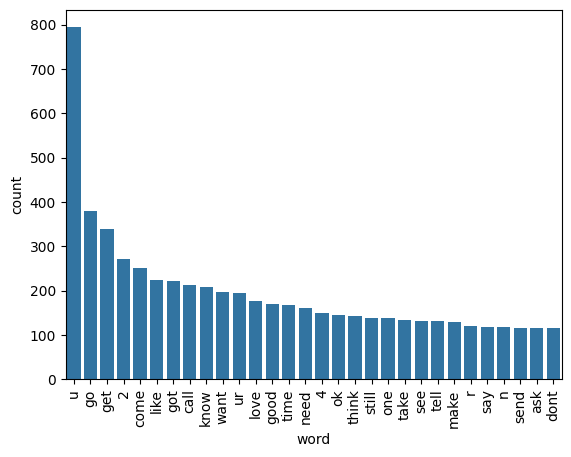

In [394]:
from collections import Counter
import pandas as pd

ham_common = pd.DataFrame(
    Counter(ham_corpus).most_common(30),
    columns=["word", "count"]
)

sns.barplot(data=ham_common, x="word", y="count")
plt.xticks(rotation=90)
plt.show()


## 4. Model Building

The first model that we will make will be **Naive Bayes Classification**. <br>
This is because it is a well known fact that Naive Bayes gives *best performance* on textual based data.

Every Machine Learning algorithm requires numerical input instead of alphabertical.<br>
Therefore, we will have to convert the input to numbers or basically vectorize the input.

We will perform three steps:
1. Vectorize the data using **bag of words**.
2. Give it as input in the Naive Bayes Algorithm.
3. Check the performance of the model.

In [395]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [396]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [397]:
X.shape

(5169, 5643)

In [398]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [399]:
y = df['target'].values

In [400]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [401]:
# Applying train-test split
from sklearn.model_selection import train_test_split

In [402]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

#### Import all the Naives Bayes Algorithms

In [403]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [404]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

**Accuracy Score:** The ratio of correct predictions (true positives + true negatives) to the total number of predictions. <br>
**Precision:** The fraction of positive cases correctly identified (the number of true positives divided by the number of true positives plus false positives).
**Confusion Matrix:** It is a tabulation of the predicted and actual value counts for each possible class.

In [405]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [406]:
# 1.GaussianNB
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.7949709864603481
[[705 191]
 [ 21 117]]
0.37987012987012986


In [407]:
# 2.MultinomialNB
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9632495164410058
[[877  19]
 [ 19 119]]
0.8623188405797102


In [408]:
# 3.BernoulliNB
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9709864603481625
[[892   4]
 [ 26 112]]
0.9655172413793104


From the above results, we can see that **Bernoulli Naive Bayes** is giving the best results.

Now, we will check the performance of the model with **TfidfVectorizer** instead of CountVectorizer.

In [409]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [410]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [411]:
y = df['target'].values

In [412]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [413]:
# 1.GaussianNB
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.7940038684719536
[[707 189]
 [ 24 114]]
0.37623762376237624


In [414]:
# 2.MultinomialNB
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9516441005802708
[[896   0]
 [ 50  88]]
1.0


In [415]:
# 3.BernoulliNB
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9709864603481625
[[892   4]
 [ 26 112]]
0.9655172413793104


As data is imbalanced, **precision score** matters more than accuracy score in this model.

In **MultinomialNB** with **TfidfVectorizer**, the *precision_score is 1*, therefore, we will chose this model.
This is because we need a model which will not make any mistake. It will not label any email as spam when the email is not spam.

Now, we will compare our results with all the other models and check which one is the best performing one.

In [416]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [417]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [418]:
# Creating dictionary to access each model easily.
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
}

In [419]:
# Function to test models
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [420]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.965183752417795, 0.9322033898305084)

In [421]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.965183752417795
Precision -  0.9322033898305084
For  KN
Accuracy -  0.8984526112185687
Precision -  1.0
For  NB
Accuracy -  0.9516441005802708
Precision -  1.0
For  DT
Accuracy -  0.9352030947775629
Precision -  0.8514851485148515
For  LR
Accuracy -  0.9497098646034816
Precision -  0.9387755102040817


c:\Users\affan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\affan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


For  RF
Accuracy -  0.9700193423597679
Precision -  0.9819819819819819
For  AdaBoost
Accuracy -  0.9245647969052224
Precision -  0.875
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8740157480314961
For  ETC
Accuracy -  0.971953578336557
Precision -  0.9823008849557522
For  GBDT
Accuracy -  0.9497098646034816
Precision -  0.8981481481481481


In [422]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [423]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.898453,1.000000
2,NB,0.951644,1.000000
8,ETC,0.971954,0.982301
5,RF,0.970019,0.981982
4,LR,0.949710,0.938776
0,SVC,0.965184,0.932203
9,GBDT,0.949710,0.898148
6,AdaBoost,0.924565,0.875000
7,BgC,0.958414,0.874016
3,DT,0.935203,0.851485


After observing the above results, we are still inclined to use **Naive Bayes Algorithm** as it is giving the best precision score.

## Model Improvement

1. Change the max_features parameter of TfIdf to 3000.

In [424]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 3000)

X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [425]:
# 1.GaussianNB
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.7940038684719536
[[707 189]
 [ 24 114]]
0.37623762376237624


In [426]:
# 2.MultinomialNB
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9632495164410058
[[894   2]
 [ 36 102]]
0.9807692307692307


In [427]:
# 3.BernoulliNB
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9738878143133463
[[894   2]
 [ 25 113]]
0.9826086956521739


In [428]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9680851063829787
Precision -  0.9338842975206612
For  KN
Accuracy -  0.9052224371373307
Precision -  0.9761904761904762
For  NB
Accuracy -  0.9632495164410058
Precision -  0.9807692307692307
For  DT
Accuracy -  0.9332688588007737
Precision -  0.8165137614678899
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9523809523809523


c:\Users\affan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
c:\Users\affan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(


For  RF
Accuracy -  0.971953578336557
Precision -  0.9823008849557522
For  AdaBoost
Accuracy -  0.925531914893617
Precision -  0.8505747126436781
For  BgC
Accuracy -  0.9555125725338491
Precision -  0.859375
For  ETC
Accuracy -  0.971953578336557
Precision -  0.9658119658119658
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.9285714285714286


In [429]:
performance_df1 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [430]:
performance_df1

,Algorithm,Accuracy,Precision
5,RF,0.971954,0.982301
2,NB,0.963250,0.980769
1,KN,0.905222,0.976190
8,ETC,0.971954,0.965812
4,LR,0.958414,0.952381
0,SVC,0.968085,0.933884
9,GBDT,0.947776,0.928571
7,BgC,0.955513,0.859375
6,AdaBoost,0.925532,0.850575
3,DT,0.933269,0.816514


In [431]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [432]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.898453,1.000000,0.905222,0.976190
1,NB,0.951644,1.000000,0.963250,0.980769
2,ETC,0.971954,0.982301,0.971954,0.965812
3,RF,0.970019,0.981982,0.971954,0.982301
4,LR,0.949710,0.938776,0.958414,0.952381
5,SVC,0.965184,0.932203,0.968085,0.933884
6,GBDT,0.949710,0.898148,0.947776,0.928571
7,AdaBoost,0.924565,0.875000,0.925532,0.850575
8,BgC,0.958414,0.874016,0.955513,0.859375
9,DT,0.935203,0.851485,0.933269,0.816514


Next, we will try to improve the results of the model by using **Voting Classifier**.

In [443]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [444]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [445]:
voting.fit(X_train,y_train)

,"estimators estimators: list of (str, estimator) tuplesInvoking the ``fit`` method on the ``VotingClassifier`` will fit clonesof those original estimators that will be stored in the class attribute``self.estimators_``. An estimator can be set to ``'drop'`` using:meth:`set_params`... versionchanged:: 0.21 ``'drop'`` is accepted. Using None was deprecated in 0.22 and support was removed in 0.24.","[('svm', ...), ('nb', ...), ...]"
,"voting voting: {'hard', 'soft'}, default='hard'If 'hard', uses predicted class labels for majority rule voting.Else if 'soft', predicts the class label based on the argmax ofthe sums of the predicted probabilities, which is recommended foran ensemble of well-calibrated classifiers.",'soft'
,"weights weights: array-like of shape (n_classifiers,), default=NoneSequence of weights (`float` or `int`) to weight the occurrences ofpredicted class labels (`hard` voting) or class probabilitiesbefore averaging (`soft` voting). Uses uniform weights if `None`.",None
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for ``fit``.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionadded:: 0.18",None
,"flatten_transform flatten_transform: bool, default=TrueAffects shape of transform output only when voting='soft'If voting='soft' and flatten_transform=True, transform method returnsmatrix with shape (n_samples, n_classifiers * n_classes). Ifflatten_transform=False, it returns(n_classifiers, n_samples, n_classes).",True
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting will be printed as itis completed... versionadded:: 0.23",False
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'sigmoid'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",1.0
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0


In [446]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9738878143133463
Precision 0.9743589743589743


As **Precision** is more important to us, we will not implement this model.

Next, we will use **Stacking**.<br>
Stacking is very similar to voting but in this we give weightage to models.

In [447]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [448]:
from sklearn.ensemble import StackingClassifier

In [449]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [450]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9748549323017408
Precision 0.9516129032258065


As it can be clearly observed from the above results, Stacking is not the way to go.

Therefore, after trying multiple methods, the best result is given by **Multinomial Naive Bayes**.<br>
Hence, we will use this model going forward.

## Export

In [451]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))